# Exploratory Data Analysis:

### Format and prepare data for EDA:

In [251]:
# Import the necessary packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from matplotlib.dates import DateFormatter as dateform
import matplotlib.dates as mdates

In [252]:
# load in our preprocessed data
df = pd.read_csv(r'data_preprocessed.csv', sep=',')

In [253]:
# Check to verify that our data is in the proper condition before continuing
df.head()

Unnamed: 0 Demand Date  Monday  Tuesday  Wednesday  Thursday  Friday  \
0           0  2013-10-04       0        0          0         0       1   
1           1  2013-10-05       0        0          0         0       0   
2           2  2013-10-06       0        0          0         0       0   
3           3  2013-10-07       1        0          0         0       0   
4           4  2013-10-08       0        1          0         0       0   

   Saturday  Sunday  January  ...  Total Fish Production  \
0         0       0        0  ...                     24   
1         1       0        0  ...                     21   
2         0       1        0  ...                     22   
3         0       0        0  ...                     10   
4         0       0        0  ...                     20   

   Total Meat Production  Total      Wind  Cloudiness  Precipitation  SUN  \
0                    149    173  1.916667    7.666667            0.1  150   
1                    147    168  2.738462    6.923077           10.7    0   
2                     69     91  1.364286    8.000000            0.4    0   
3                     91    101  2.316667    6.416667            0.0  176   
4                     98    118  1.658333    8.000000            0.0    0   

   Air temperature  Is Holiday  Weekend  
0        15.858333           0        0  
1        13.192308           0        1  
2        10.571429           0        1  
3        13.333333           0        0  
4        13.541667           0        0  

[5 rows x 41 columns]

In [254]:
# dropping the first column and setting the index to the demand date
del df[df.columns[0]]

In [255]:
df.rename(columns={'Demand Date':'Date', 'SUN':'Sun'}, inplace=True)

In [256]:
df.set_index('Date', inplace=True)

In [257]:
# checking to see that our changes have taken place
df.head()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Date                                                                         
2013-10-04       0        0          0         0       1         0       0   
2013-10-05       0        0          0         0       0         1       0   
2013-10-06       0        0          0         0       0         0       1   
2013-10-07       1        0          0         0       0         0       0   
2013-10-08       0        1          0         0       0         0       0   

            January  February  March  ...  Total Fish Production  \
Date                                  ...                          
2013-10-04        0         0      0  ...                     24   
2013-10-05        0         0      0  ...                     21   
2013-10-06        0         0      0  ...                     22   
2013-10-07        0         0      0  ...                     10   
2013-10-08        0         0      0  ...                     20   

            Total Meat Production  Total      Wind  Cloudiness  Precipitation  \
Date                                                                            
2013-10-04                    149    173  1.916667    7.666667            0.1   
2013-10-05                    147    168  2.738462    6.923077           10.7   
2013-10-06                     69     91  1.364286    8.000000            0.4   
2013-10-07                     91    101  2.316667    6.416667            0.0   
2013-10-08                     98    118  1.658333    8.000000            0.0   

            Sun  Air temperature  Is Holiday  Weekend  
Date                                                   
2013-10-04  150        15.858333           0        0  
2013-10-05    0        13.192308           0        1  
2013-10-06    0        10.571429           0        1  
2013-10-07  176        13.333333           0        0  
2013-10-08    0        13.541667           0        0  

[5 rows x 39 columns]

In [258]:
df.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       '2013', '2014', '2015', 'Calamari', 'Fish', 'Shrimp', 'Chicken',
       'Koefte', 'Lamb', 'Steak', 'Total Fish Production',
       'Total Meat Production', 'Total', 'Wind', 'Cloudiness', 'Precipitation',
       'Sun', 'Air temperature', 'Is Holiday', 'Weekend'],
      dtype='object')

In [259]:
# verify that all of our columns contain the correct type of information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 2013-10-04 to 2015-11-07
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Monday                 760 non-null    int64  
 1   Tuesday                760 non-null    int64  
 2   Wednesday              760 non-null    int64  
 3   Thursday               760 non-null    int64  
 4   Friday                 760 non-null    int64  
 5   Saturday               760 non-null    int64  
 6   Sunday                 760 non-null    int64  
 7   January                760 non-null    int64  
 8   February               760 non-null    int64  
 9   March                  760 non-null    int64  
 10  April                  760 non-null    int64  
 11  May                    760 non-null    int64  
 12  June                   760 non-null    int64  
 13  July                   760 non-null    int64  
 14  August                 760 non-null    int64  


Now that our dataset is ready for action, we can begin our data analysis. One thing that many restaurants look out for is seasonality. Especially taking into account various holidays and different weather patterns that come and go with the seasons, restaurant-goers' behaviours can change drastically throughout the year. Let's first take a look at if any seasonality
exists within our dataset.  

Text(0.5, 1.0, 'Total Demand from 2013 to 2015')

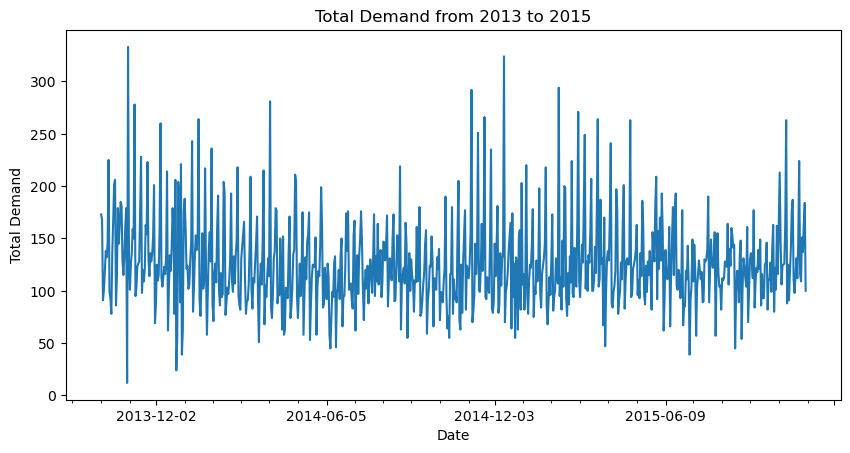

In [308]:
plt.rcdefaults()
# Graph for seasonality
fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.plot(df['Total'])
plt.xlabel('Date')
plt.ylabel('Total Demand')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(3, 9)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_title('Total Demand from 2013 to 2015')

As we can see in the above graph, while it does show some high spikes at certain times of the year, it is not all that helpful. Let's move graph the total demands one year at a time to see if there is any seasonality.

In [262]:
# separate out Total demand by year
demand_2013 = df.loc['2013-10-04':'2013-12-31']['Total']
demand_2014 = df.loc['2014-01-01':'2014-12-31']['Total']
demand_2015 = df.loc['2015-01-01':'2015-11-07']['Total']

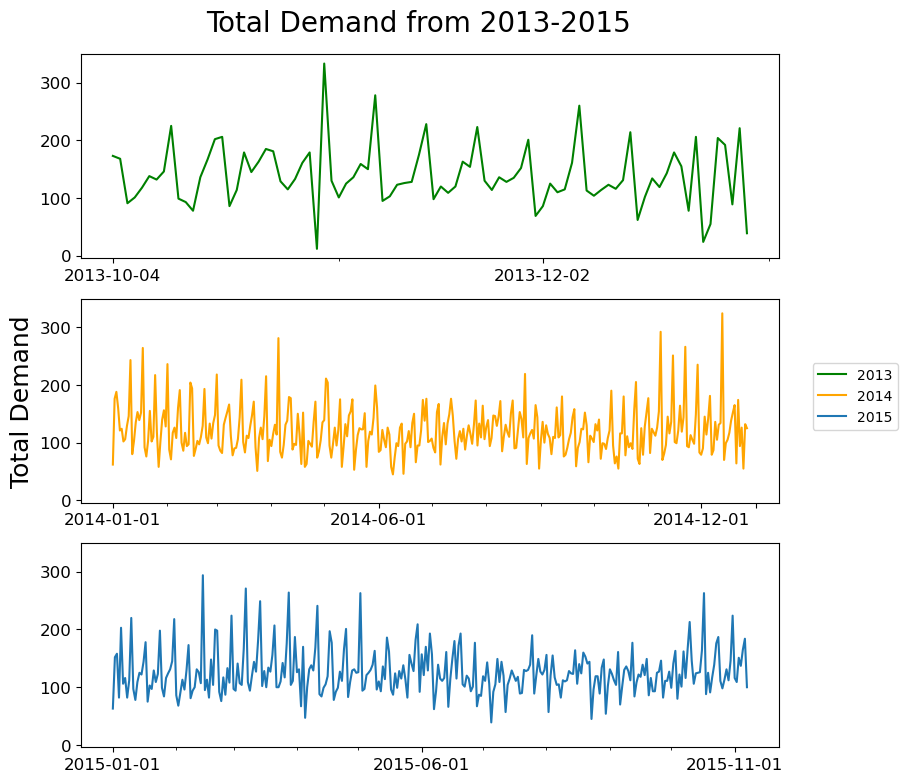

In [309]:
plt.rcdefaults()
# plot each year's total demand individually
labels = ['2013', '2014', '2015']
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey=True)
fig.set_figheight(9)
fig.set_figwidth(9)
ax1.plot(demand_2013, color='green')
ax2.plot(demand_2014, color='orange')
ax3.plot(demand_2015)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 3)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 6, 12)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 6, 11)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
fig.suptitle("Total Demand from 2013-2015", fontsize=20, y=0.93)
plt.figlegend(labels, loc='center left', bbox_to_anchor=(0.93, 0.5))
ax2.set_ylabel('Total Demand', fontsize=18)
ax1.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)

While it is not entirely clear to see, there is a slight amount of seasonality within our dataset. Granted we only have two full years of data, we can see that for both 2014 and 2015 there is, on average, a lower level of demand during the Summer months and into Fall - specifically from June to roughly October. From November through April/May there is an elevated level of demand compared to the rest of the year.

Now that we've taken a quick look at seasonality on a large scale, what about how demand changes throughout the week?

In [304]:
# subset dataframe to contain dummy variables for days of the week
day = df.loc[:, 'Monday':'Sunday']

# condense day of the week into one single categorical variable
day_of_week = day.idxmax(axis=1)

# add this column back into the dataframe
df['Day'] = day_of_week
df.head()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Date                                                                         
2013-10-04       0        0          0         0       1         0       0   
2013-10-05       0        0          0         0       0         1       0   
2013-10-06       0        0          0         0       0         0       1   
2013-10-07       1        0          0         0       0         0       0   
2013-10-08       0        1          0         0       0         0       0   

            January  February  March  ...  Cloudiness  Precipitation  Sun  \
Date                                  ...                                   
2013-10-04        0         0      0  ...    7.666667            0.1  150   
2013-10-05        0         0      0  ...    6.923077           10.7    0   
2013-10-06        0         0      0  ...    8.000000            0.4    0   
2013-10-07        0         0      0  ...    6.416667            0.0  176   
2013-10-08        0         0      0  ...    8.000000            0.0    0   

            Air temperature  Is Holiday  Weekend       Day  Is Weekday  \
Date                                                                     
2013-10-04        15.858333           0        0    Friday           1   
2013-10-05        13.192308           0        1  Saturday           0   
2013-10-06        10.571429           0        1    Sunday           0   
2013-10-07        13.333333           0        0    Monday           1   
2013-10-08        13.541667           0        0   Tuesday           1   

            Is Holiday and Weekend  Weekend_Holiday_Status  
Date                                                        
2013-10-04                       0              Is Weekday  
2013-10-05                       0                 Weekend  
2013-10-06                       0                 Weekend  
2013-10-07                       0              Is Weekday  
2013-10-08                       0              Is Weekday  

[5 rows x 43 columns]

Text(0.5, 0, 'Day of the Week')

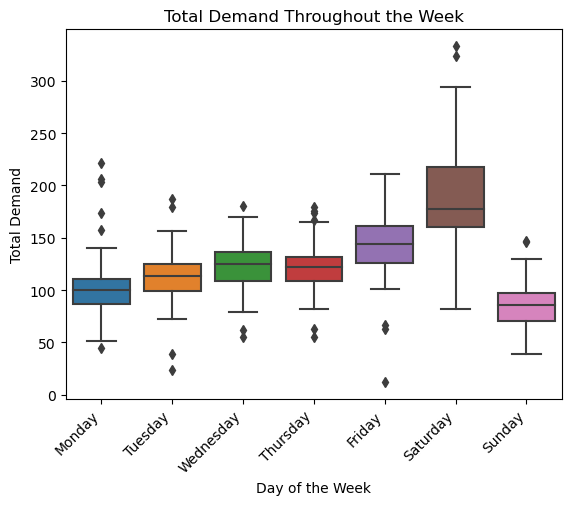

In [310]:
plt.rcdefaults()
# plot a box plot to see how the demand changes throughout the week
my_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=df, x='Day', y ='Total', order=my_order)
plt.xticks(rotation = 45, ha='right')
plt.title('Total Demand Throughout the Week')
plt.ylabel('Total Demand')
plt.xlabel('Day of the Week')

As we can clearly see here, there is a clear rise in demand as the week progresses with Saturday having a significantly larger demand than the rest of the days of the week. However, one surprising thing about this is how Sunday is significantly less than the rest of the week - Monday included. This is surprising to me mainly because Sunday is usually a day where most people have the day off in many countries and I expected to see Sunday's demand up there alongside Saturday. This could be due to cultural differences or other underlying societal factors.

Now that we have an idea of how demand varies throughout the week, lets take a look at the main focus of our project - the weather. How does demand change with the weather?

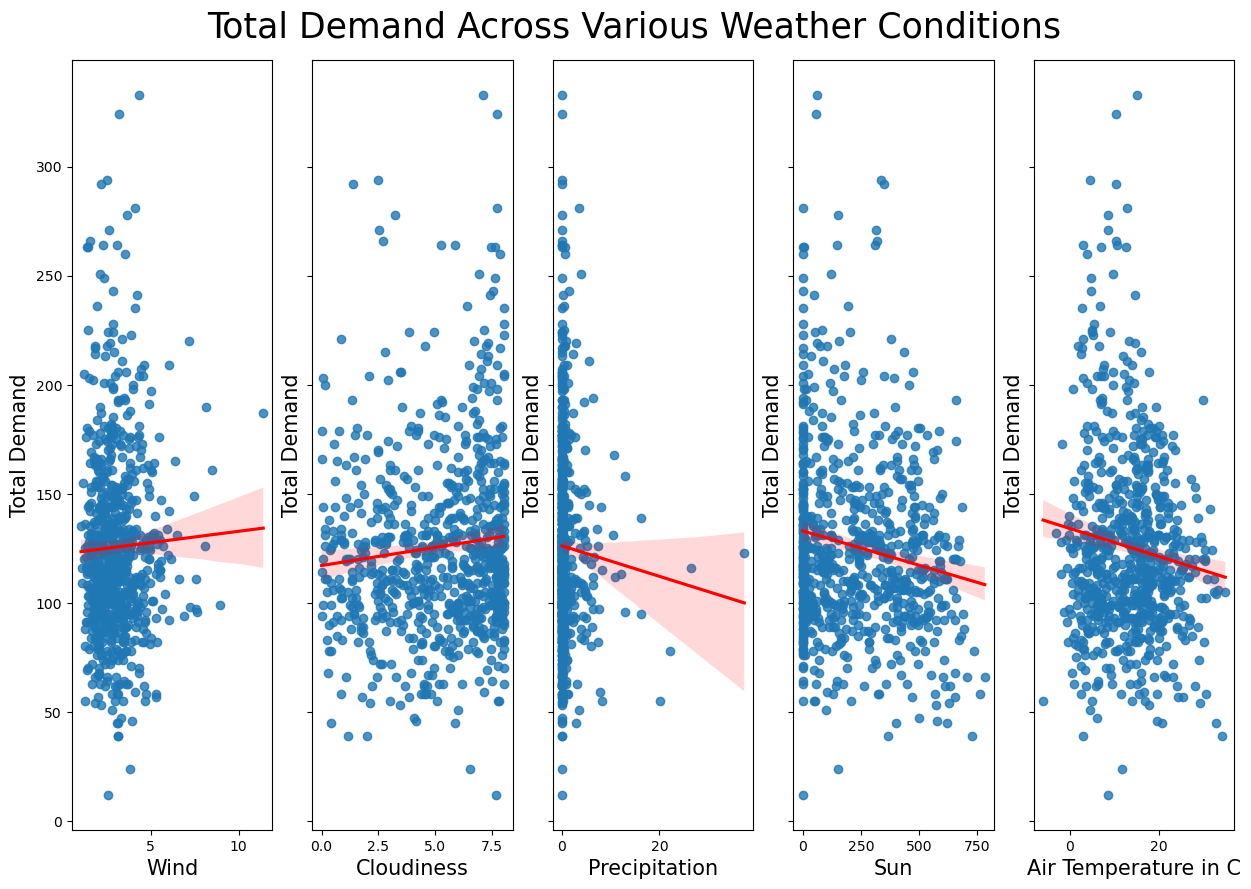

In [311]:
plt.rcdefaults()
fig, axes = plt.subplots(1,5, sharey=True,figsize=(15,10))
fig1 = sns.regplot(data=df, x='Wind',y='Total', ax=axes[0], line_kws={"color": "red"})
fig2 = sns.regplot(data=df,x='Cloudiness',y='Total', ax=axes[1], line_kws={"color": "red"})
fig3 = sns.regplot(data=df,x='Precipitation',y='Total', ax=axes[2], line_kws={"color": "red"})
fig4 = sns.regplot(data=df,x='Sun',y='Total', ax=axes[3], line_kws={"color": "red"})
fig5 = sns.regplot(data=df,x='Air temperature',y='Total', ax=axes[4], line_kws={"color": "red"})
fig.suptitle('Total Demand Across Various Weather Conditions', fontsize=25, y=0.93)
axes[0].set_xlabel('Wind',fontsize=15)
axes[1].set_xlabel('Cloudiness',fontsize=15)
axes[2].set_xlabel('Precipitation',fontsize=15)
axes[3].set_xlabel('Sun',fontsize=15)
axes[4].set_xlabel('Air Temperature in C',fontsize=15)
for i in range(5):
    axes[i].set_ylabel('Total Demand', fontsize = 15)

While definitely not an exhaustive attempt at looking into the effects of weather, a preliminary idea is given to us. First, as both wind and cloudiness increases, we see a slight increase in demand at the restaurant. On the other hand, as rain, sun, and temperature rise - restaurant attendance seems to decline. This could be attributed to the fact that rising wind and cloudiness might correlate with lower temperatures, driving customers indoors into restuarants and shops thus driving up demand. On the contrary, increased precipitation, sun, and temperature might convince some clientele to stay indoors and at home altogether, thus driving down demand.

Now what about demand across weekends and holidays?

In [267]:
# let's see if there is a difference in demand if it is a weekday, weekend, holiday, or both
kindofday = df['Is Holiday'] + df['Weekend']

In [268]:
is_weekday = []
is_both = []
for i in kindofday:
    if i == 0:
        is_weekday.append(1)
        is_both.append(0)
    elif i == 2:
        is_both.append(2)
        is_weekday.append(0)
    else:
        is_weekday.append(0)
        is_both.append(0)

weekday = pd.Series(is_weekday)
holiday_and_weekend = pd.Series(is_both)

holiday_and_weekend.unique()

array([0, 2], dtype=int64)

In [269]:
df['Is Weekday'] = weekday.values
df['Is Holiday and Weekend'] = holiday_and_weekend.values

df.head()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Date                                                                         
2013-10-04       0        0          0         0       1         0       0   
2013-10-05       0        0          0         0       0         1       0   
2013-10-06       0        0          0         0       0         0       1   
2013-10-07       1        0          0         0       0         0       0   
2013-10-08       0        1          0         0       0         0       0   

            January  February  March  ...      Wind  Cloudiness  \
Date                                  ...                         
2013-10-04        0         0      0  ...  1.916667    7.666667   
2013-10-05        0         0      0  ...  2.738462    6.923077   
2013-10-06        0         0      0  ...  1.364286    8.000000   
2013-10-07        0         0      0  ...  2.316667    6.416667   
2013-10-08        0         0      0  ...  1.658333    8.000000   

            Precipitation  Sun  Air temperature  Is Holiday  Weekend  \
Date                                                                   
2013-10-04            0.1  150        15.858333           0        0   
2013-10-05           10.7    0        13.192308           0        1   
2013-10-06            0.4    0        10.571429           0        1   
2013-10-07            0.0  176        13.333333           0        0   
2013-10-08            0.0    0        13.541667           0        0   

                 Day  Is Weekday  Is Holiday and Weekend  
Date                                                      
2013-10-04    Friday           1                       0  
2013-10-05  Saturday           0                       0  
2013-10-06    Sunday           0                       0  
2013-10-07    Monday           1                       0  
2013-10-08   Tuesday           1                       0  

[5 rows x 42 columns]

In [270]:
weekend_holiday = df.loc[:, ['Is Holiday','Weekend','Is Weekday','Is Holiday and Weekend']]
weekhol_status = weekend_holiday.idxmax(axis=1)
df['Weekend_Holiday_Status'] = weekhol_status.values

In [271]:
df.head()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Date                                                                         
2013-10-04       0        0          0         0       1         0       0   
2013-10-05       0        0          0         0       0         1       0   
2013-10-06       0        0          0         0       0         0       1   
2013-10-07       1        0          0         0       0         0       0   
2013-10-08       0        1          0         0       0         0       0   

            January  February  March  ...  Cloudiness  Precipitation  Sun  \
Date                                  ...                                   
2013-10-04        0         0      0  ...    7.666667            0.1  150   
2013-10-05        0         0      0  ...    6.923077           10.7    0   
2013-10-06        0         0      0  ...    8.000000            0.4    0   
2013-10-07        0         0      0  ...    6.416667            0.0  176   
2013-10-08        0         0      0  ...    8.000000            0.0    0   

            Air temperature  Is Holiday  Weekend       Day  Is Weekday  \
Date                                                                     
2013-10-04        15.858333           0        0    Friday           1   
2013-10-05        13.192308           0        1  Saturday           0   
2013-10-06        10.571429           0        1    Sunday           0   
2013-10-07        13.333333           0        0    Monday           1   
2013-10-08        13.541667           0        0   Tuesday           1   

            Is Holiday and Weekend  Weekend_Holiday_Status  
Date                                                        
2013-10-04                       0              Is Weekday  
2013-10-05                       0                 Weekend  
2013-10-06                       0                 Weekend  
2013-10-07                       0              Is Weekday  
2013-10-08                       0              Is Weekday  

[5 rows x 43 columns]

Text(0.5, 0, 'Type of Day')

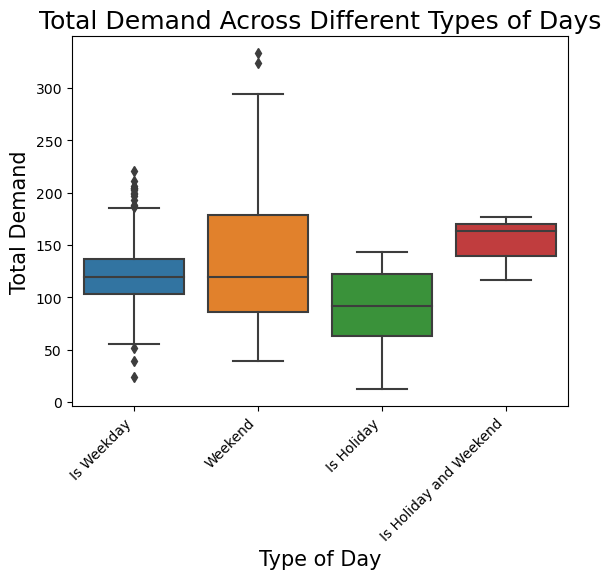

In [312]:
plt.rcdefaults()

my_order = ['Is Weekday', "Weekend", 'Is Holiday', "Is Holiday and Weekend"]

sns.boxplot(data=df, x='Weekend_Holiday_Status',y='Total',order=my_order)
plt.xticks(rotation = 45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Total Demand Across Different Types of Days', fontsize=18)
plt.ylabel('Total Demand',fontsize=15)
plt.xlabel('Type of Day',fontsize=15)

These results were a bit surprising. On average there wasn't a clear statistical difference between weekday and weekend as I had thought there would be. Even more surprising is that the median demand for holidays was lower than both weekdays and weekends. However, the median demand for days that are both holidays and weekends was the highest across the board as expected.

Let's move onto feature importances. This will help us identify important relationships to look out for as we move onto the rest of our project.

In [273]:
heatmap_df = df.drop(columns=['Day','Weekend_Holiday_Status'])
heatmap_df.head()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Date                                                                         
2013-10-04       0        0          0         0       1         0       0   
2013-10-05       0        0          0         0       0         1       0   
2013-10-06       0        0          0         0       0         0       1   
2013-10-07       1        0          0         0       0         0       0   
2013-10-08       0        1          0         0       0         0       0   

            January  February  March  ...  Total      Wind  Cloudiness  \
Date                                  ...                                
2013-10-04        0         0      0  ...    173  1.916667    7.666667   
2013-10-05        0         0      0  ...    168  2.738462    6.923077   
2013-10-06        0         0      0  ...     91  1.364286    8.000000   
2013-10-07        0         0      0  ...    101  2.316667    6.416667   
2013-10-08        0         0      0  ...    118  1.658333    8.000000   

            Precipitation  Sun  Air temperature  Is Holiday  Weekend  \
Date                                                                   
2013-10-04            0.1  150        15.858333           0        0   
2013-10-05           10.7    0        13.192308           0        1   
2013-10-06            0.4    0        10.571429           0        1   
2013-10-07            0.0  176        13.333333           0        0   
2013-10-08            0.0    0        13.541667           0        0   

            Is Weekday  Is Holiday and Weekend  
Date                                            
2013-10-04           1                       0  
2013-10-05           0                       0  
2013-10-06           0                       0  
2013-10-07           1                       0  
2013-10-08           1                       0  

[5 rows x 41 columns]

Text(0.5, 1.0, 'Overall Feature Correlative Relationships')

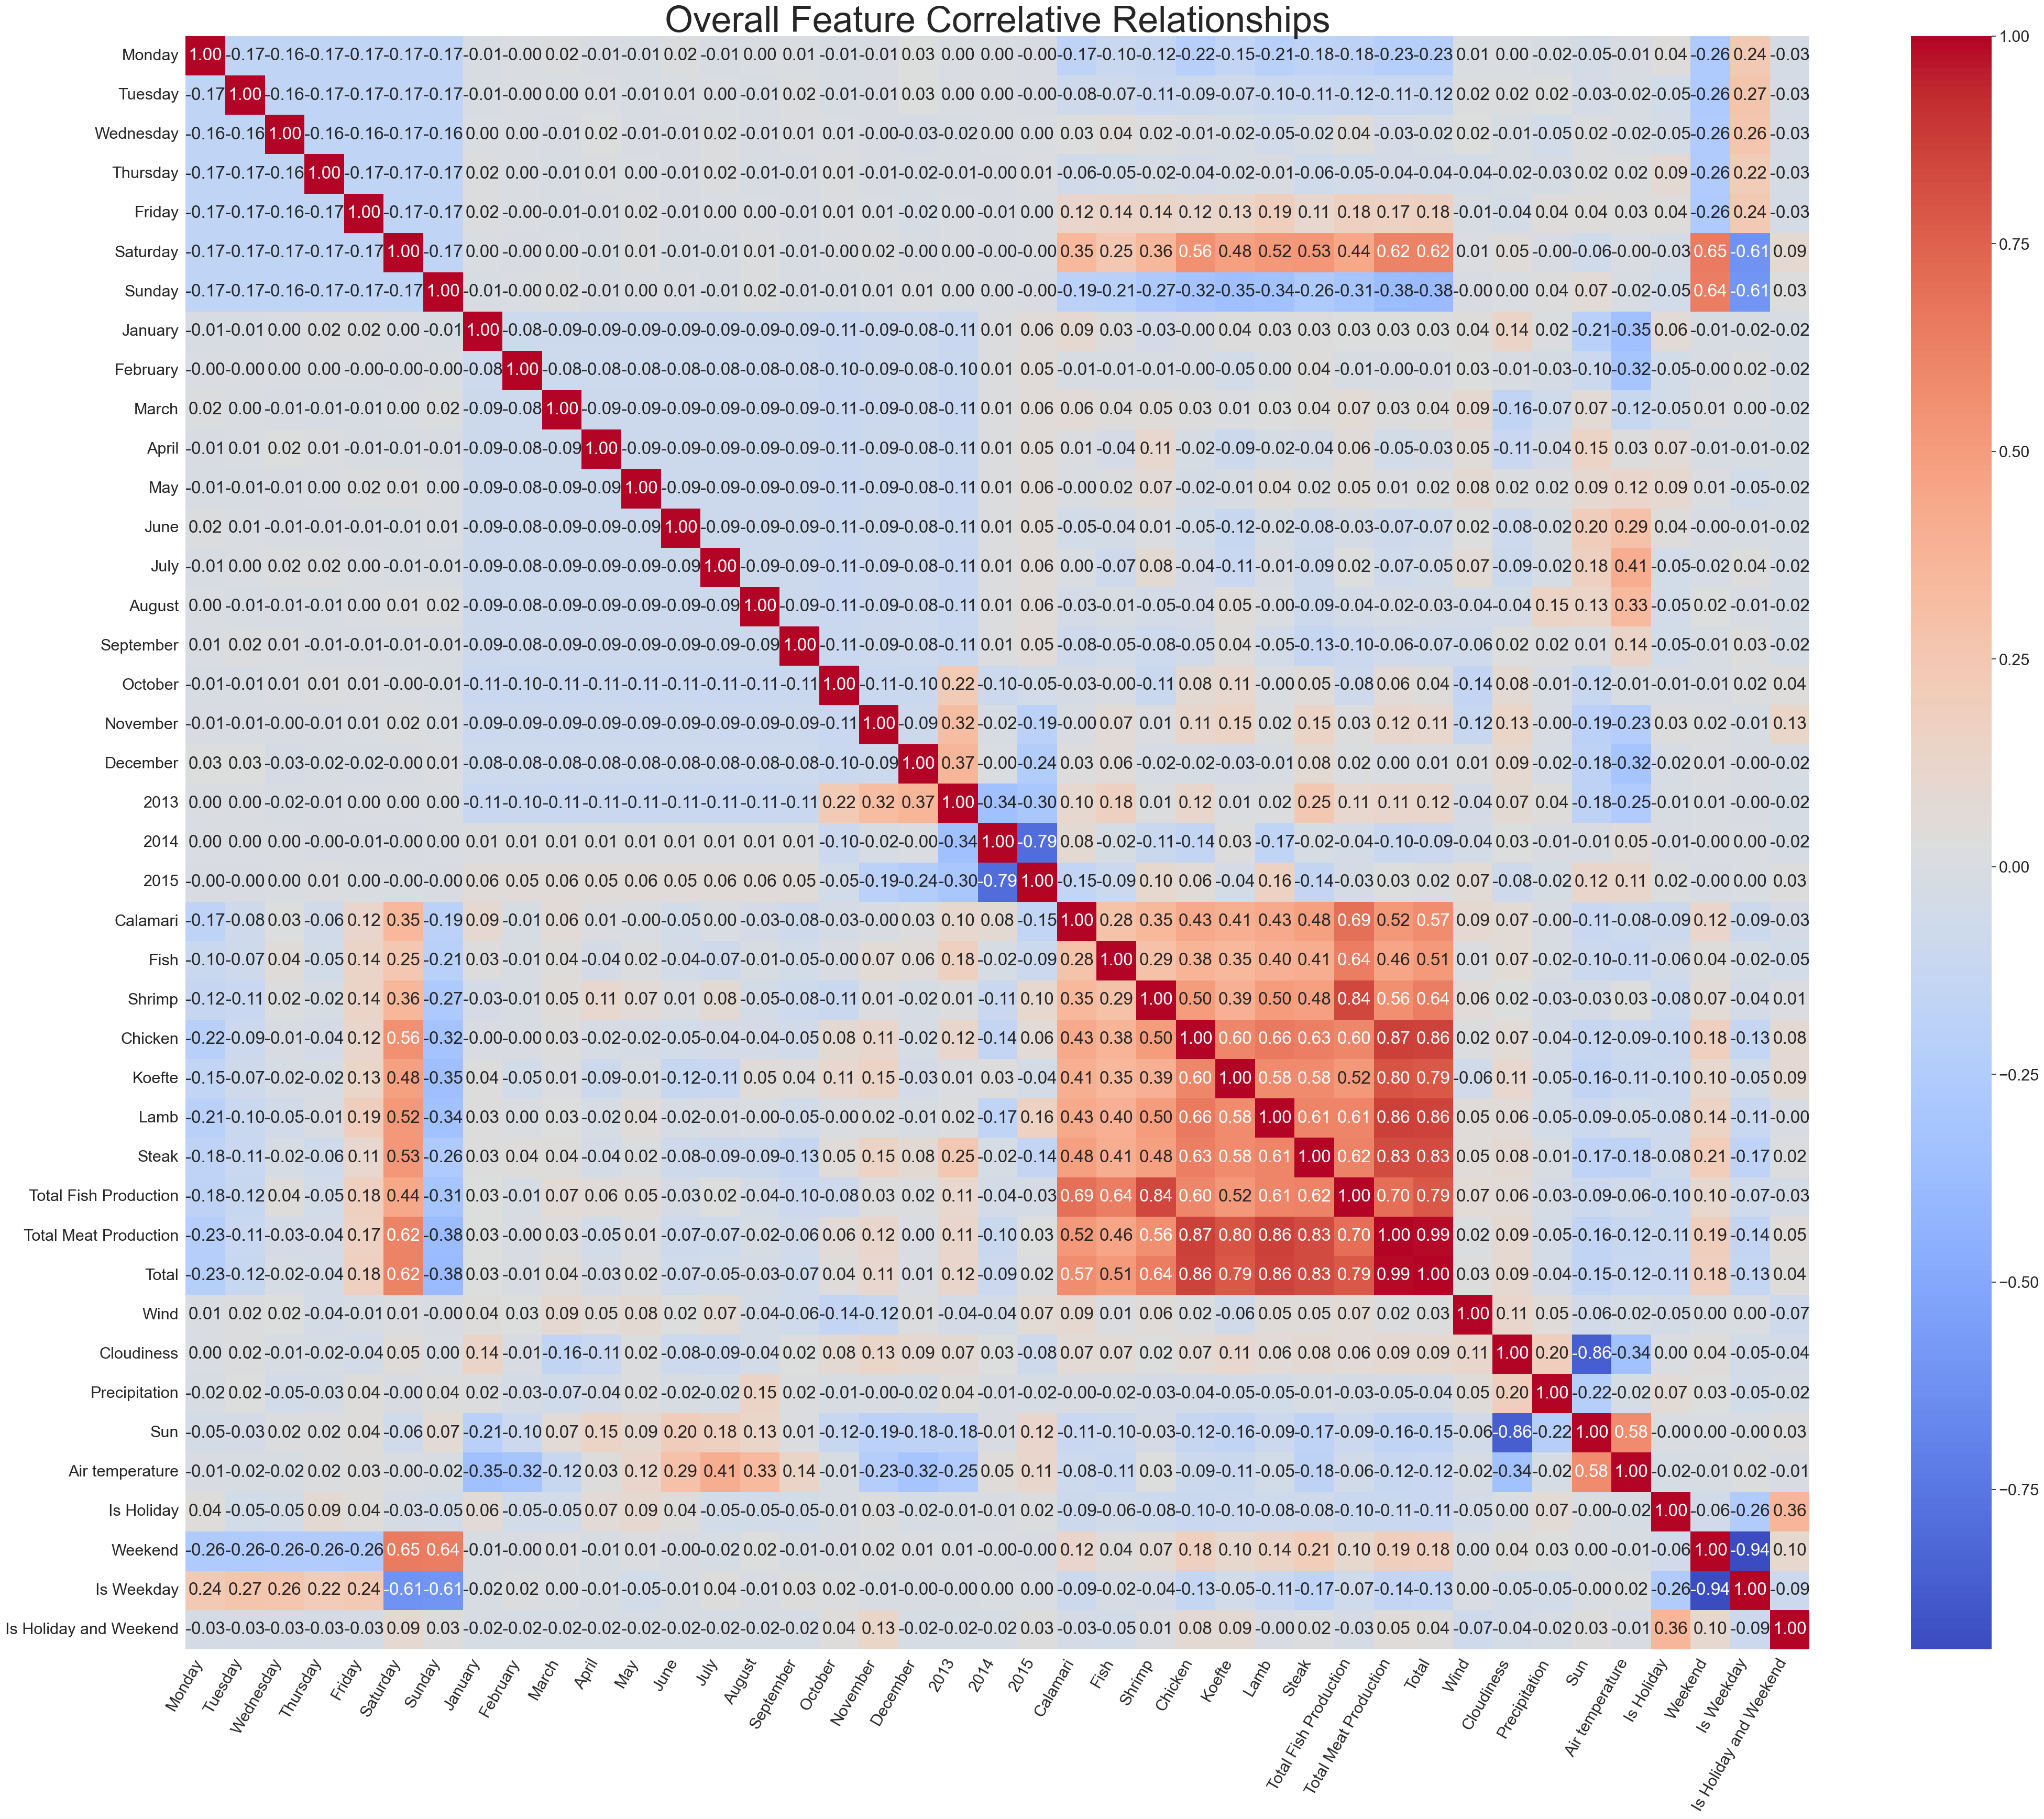

In [316]:
plt.rcdefaults()
sns.set(font_scale=2.0)
df_corr = heatmap_df.corr()
plt.figure(figsize=(50, 40))
sns.heatmap(df_corr,cmap="coolwarm", annot=True, fmt=".2f")
plt.xticks(rotation=60, ha='right') 
plt.title('Overall Feature Correlative Relationships', fontsize=50)

In [275]:
heatmap_days_only = heatmap_df.drop(columns=['Wind','Cloudiness','Precipitation','Sun','Air temperature'])
headmap_days_only = heatmap_days_only.drop(columns=['January','February','March','April','May','June','July','August','September','November','December'], inplace=True)
headmap_days_only = heatmap_days_only.drop(columns=['2013','2014','2015'], inplace=True)

In [276]:
heatmap_days_only.head()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Date                                                                         
2013-10-04       0        0          0         0       1         0       0   
2013-10-05       0        0          0         0       0         1       0   
2013-10-06       0        0          0         0       0         0       1   
2013-10-07       1        0          0         0       0         0       0   
2013-10-08       0        1          0         0       0         0       0   

            October  Calamari  Fish  ...  Koefte  Lamb  Steak  \
Date                                 ...                        
2013-10-04        1         6     6  ...      23    50     36   
2013-10-05        1         8     8  ...      36    37     30   
2013-10-06        1         6     5  ...      12    22     16   
2013-10-07        1         4     4  ...      13    28     22   
2013-10-08        1         7     4  ...      18    29     29   

            Total Fish Production  Total Meat Production  Total  Is Holiday  \
Date                                                                          
2013-10-04                     24                    149    173           0   
2013-10-05                     21                    147    168           0   
2013-10-06                     22                     69     91           0   
2013-10-07                     10                     91    101           0   
2013-10-08                     20                     98    118           0   

            Weekend  Is Weekday  Is Holiday and Weekend  
Date                                                     
2013-10-04        0           1                       0  
2013-10-05        1           0                       0  
2013-10-06        1           0                       0  
2013-10-07        0           1                       0  
2013-10-08        0           1                       0  

[5 rows x 22 columns]

Text(0.5, 1.0, 'Days Only Feature Correlative Relationships')

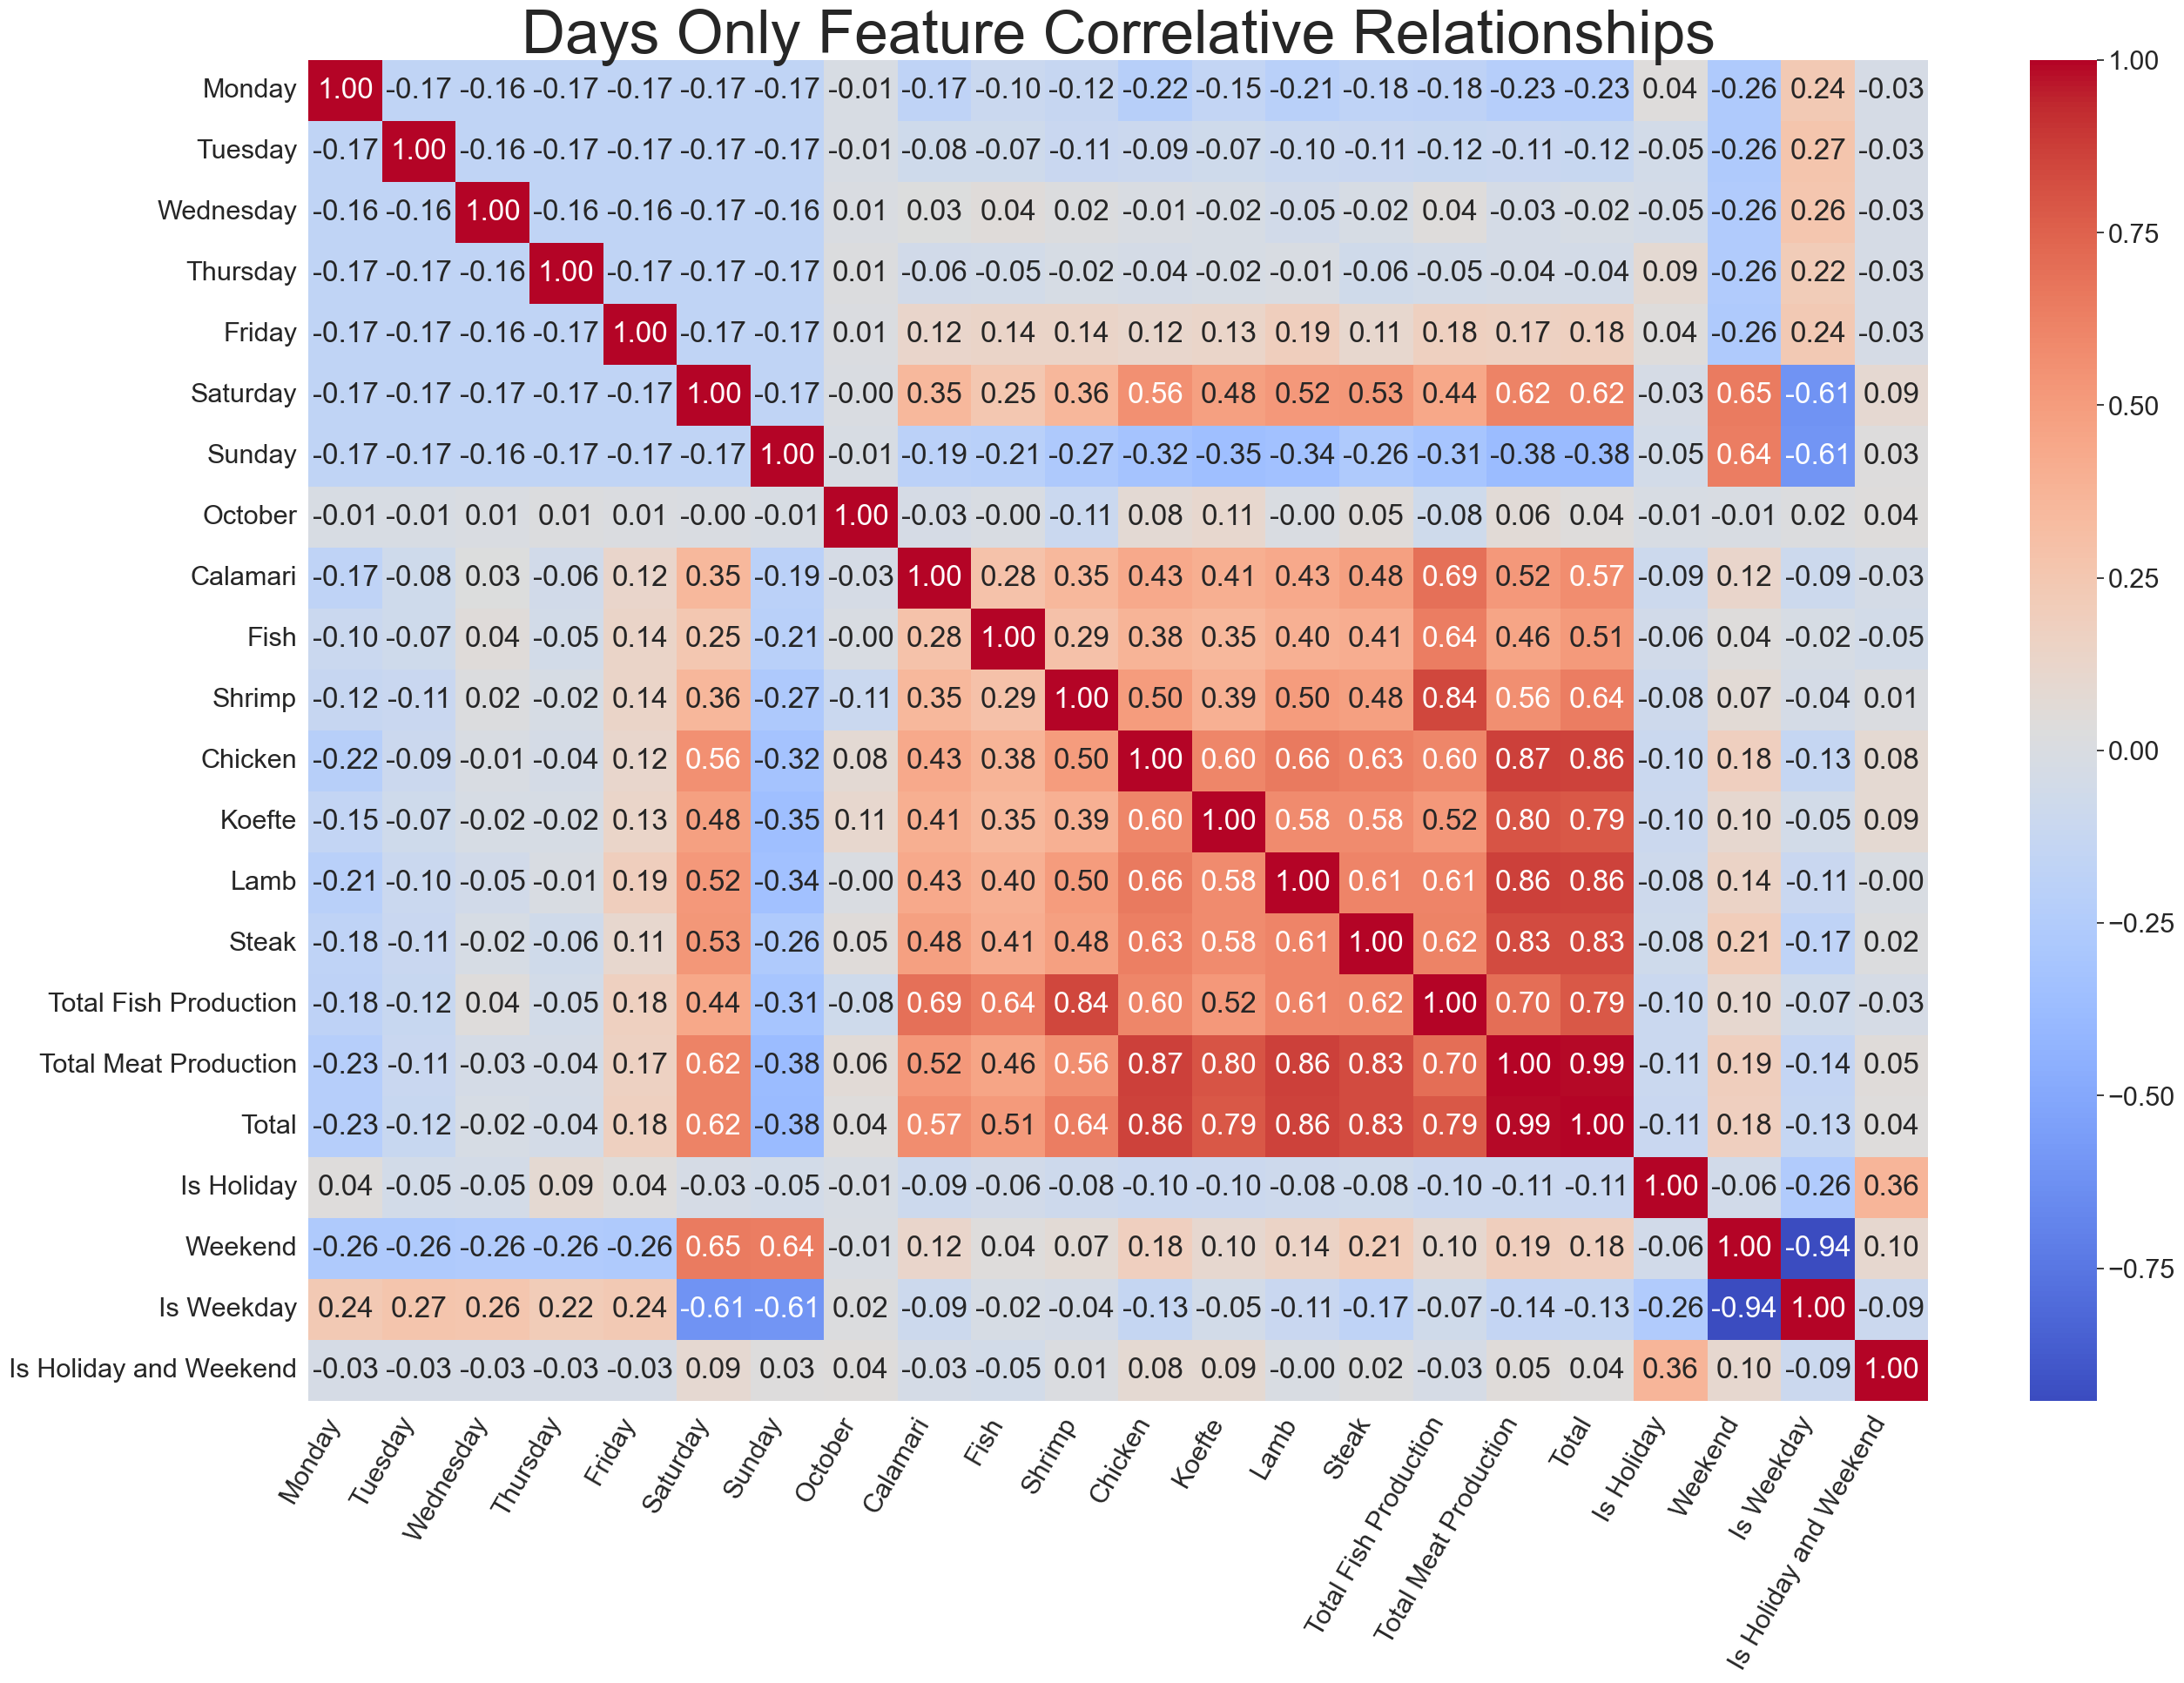

In [277]:
sns.set(font_scale=2.0)
df_corr = heatmap_days_only.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(df_corr,cmap="coolwarm", annot=True, fmt=".2f")
plt.xticks(rotation=60, ha='right') 
plt.title('Days Only Feature Correlative Relationships', fontsize=50)

In [278]:
heatmap_weather_only = heatmap_df.drop(heatmap_df.iloc[:, 0:23], axis=1)
heatmap_weather_only.head()

Fish  Shrimp  Chicken  Koefte  Lamb  Steak  Total Fish Production  \
Date                                                                            
2013-10-04     6      12       40      23    50     36                     24   
2013-10-05     8       5       44      36    37     30                     21   
2013-10-06     5      11       19      12    22     16                     22   
2013-10-07     4       2       28      13    28     22                     10   
2013-10-08     4       9       22      18    29     29                     20   

            Total Meat Production  Total      Wind  Cloudiness  Precipitation  \
Date                                                                            
2013-10-04                    149    173  1.916667    7.666667            0.1   
2013-10-05                    147    168  2.738462    6.923077           10.7   
2013-10-06                     69     91  1.364286    8.000000            0.4   
2013-10-07                     91    101  2.316667    6.416667            0.0   
2013-10-08                     98    118  1.658333    8.000000            0.0   

            Sun  Air temperature  Is Holiday  Weekend  Is Weekday  \
Date                                                                
2013-10-04  150        15.858333           0        0           1   
2013-10-05    0        13.192308           0        1           0   
2013-10-06    0        10.571429           0        1           0   
2013-10-07  176        13.333333           0        0           1   
2013-10-08    0        13.541667           0        0           1   

            Is Holiday and Weekend  
Date                                
2013-10-04                       0  
2013-10-05                       0  
2013-10-06                       0  
2013-10-07                       0  
2013-10-08                       0

Text(0.5, 1.0, 'Weather Only Feature Correlative Relationships')

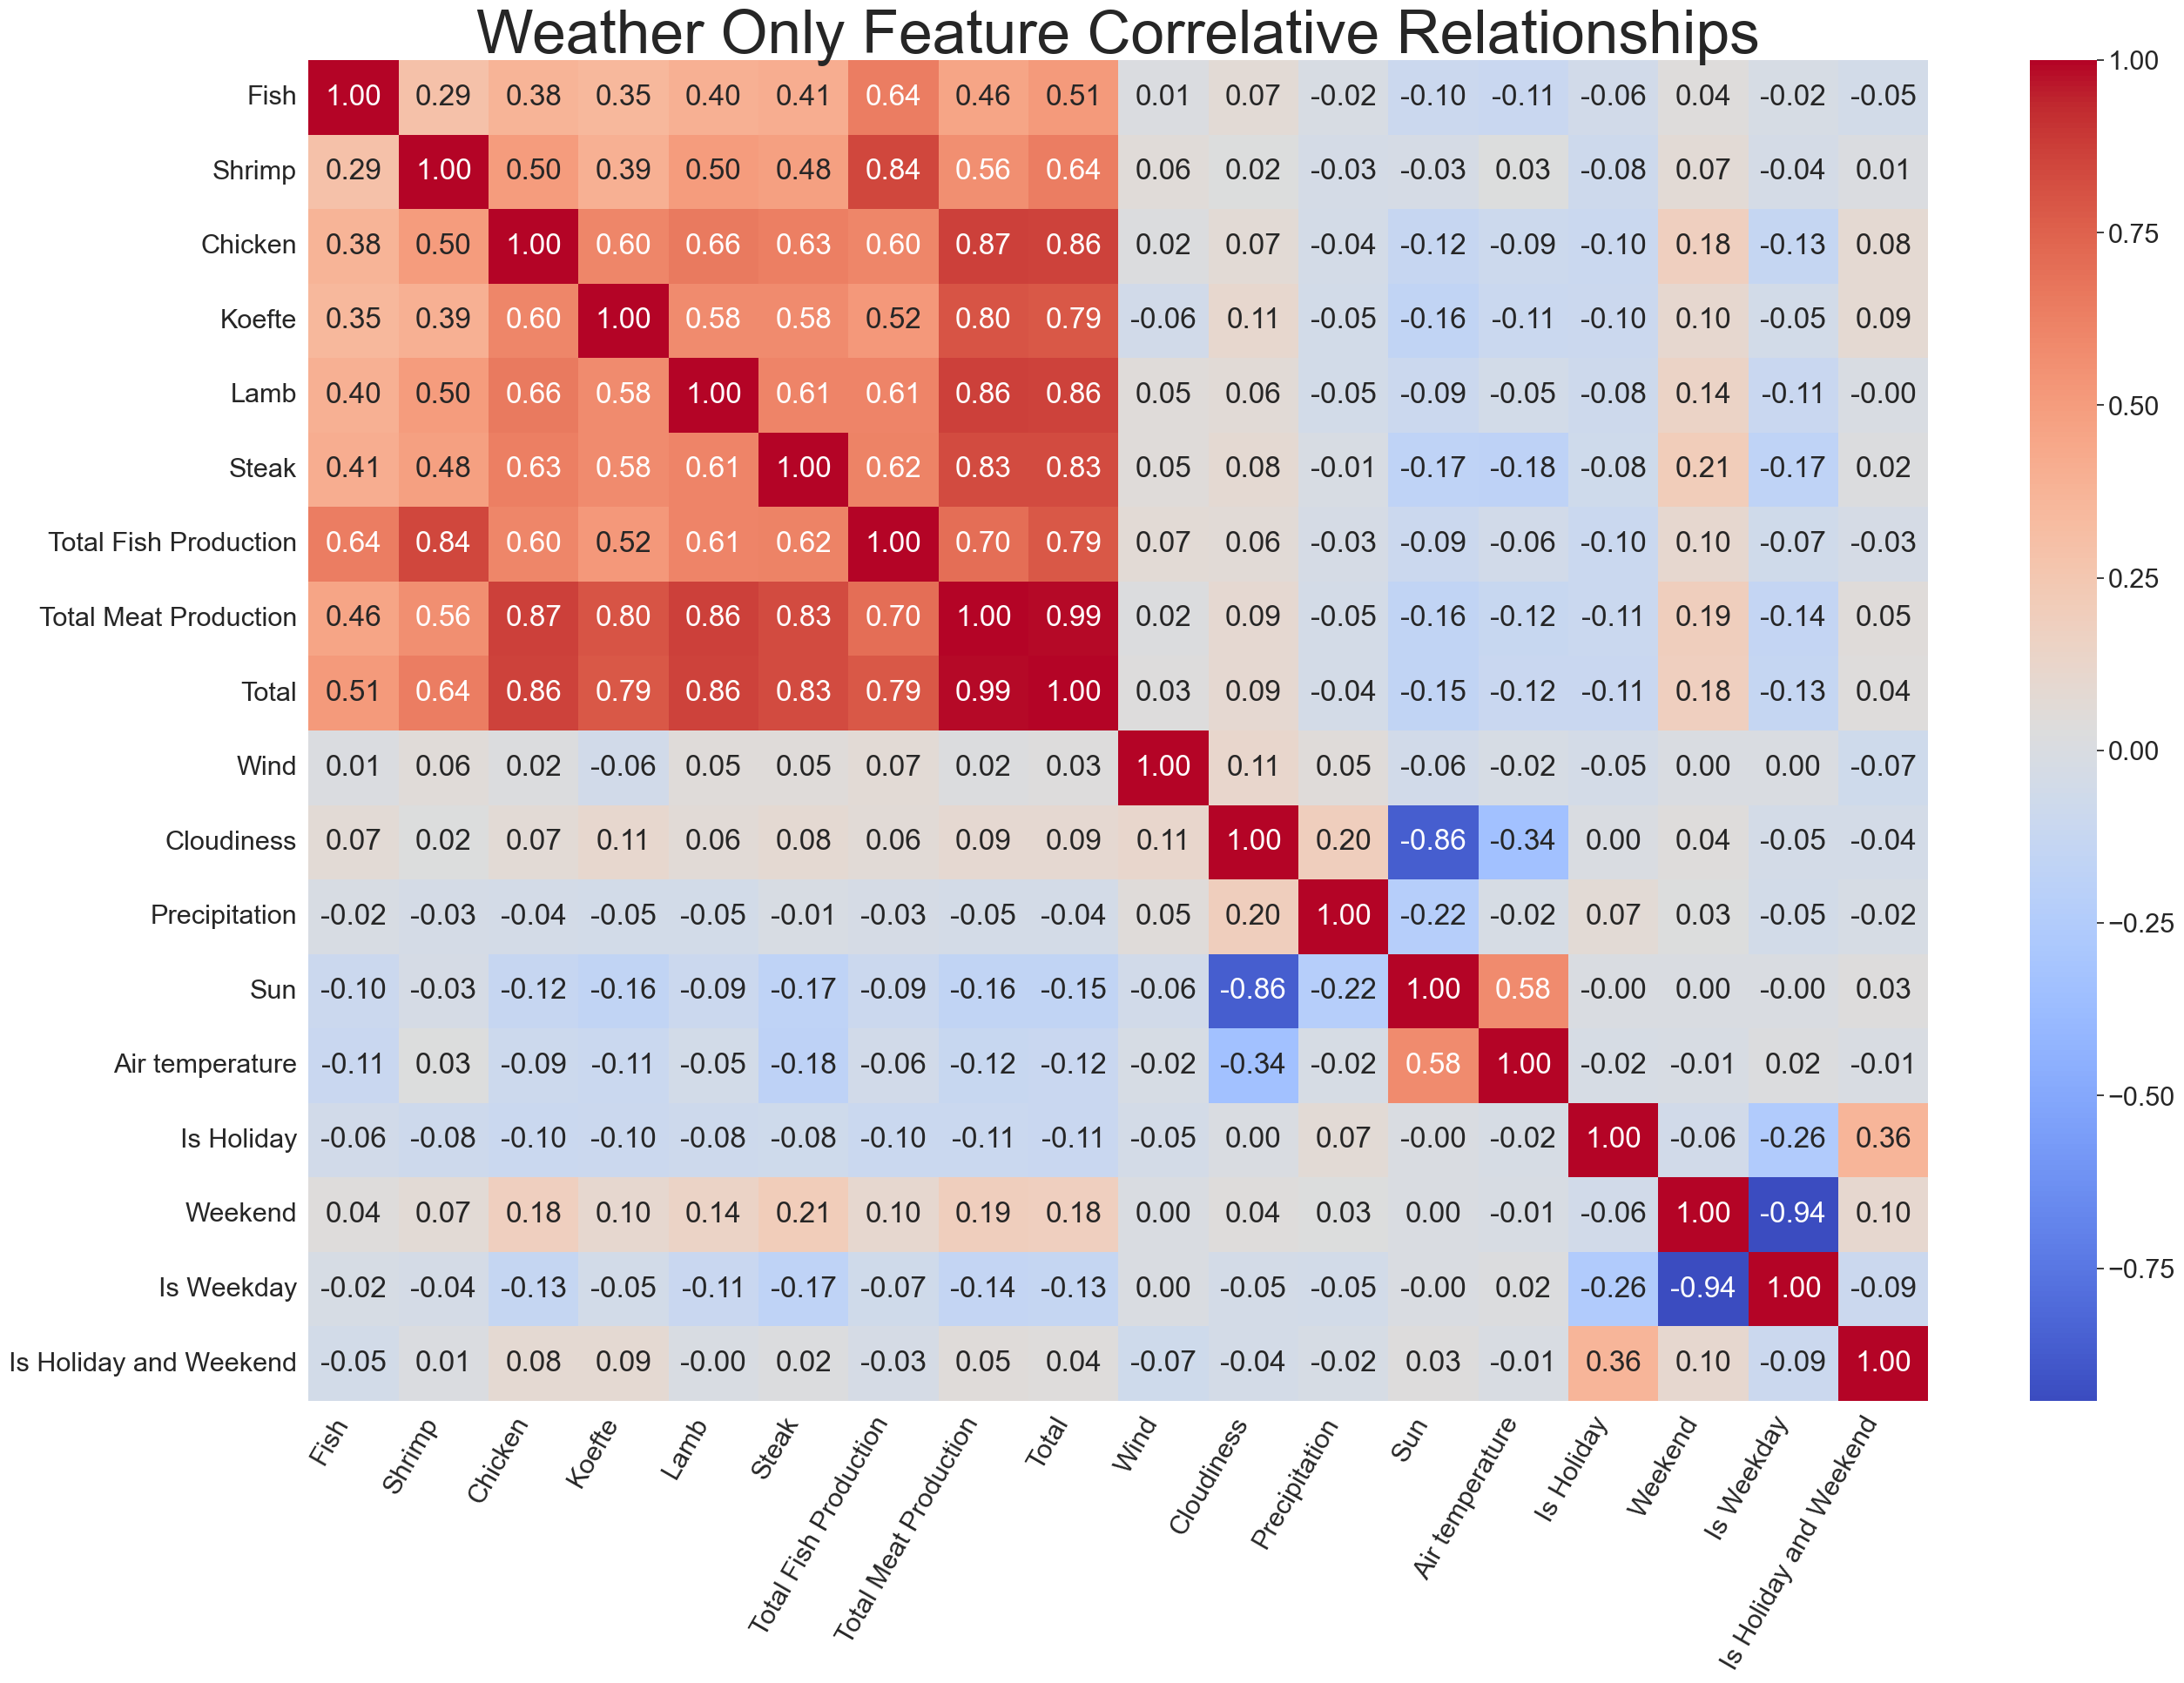

In [293]:
sns.set(font_scale=2.0)
df_corr = heatmap_weather_only.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(df_corr,cmap="coolwarm", annot=True, fmt=".2f")
plt.xticks(rotation=60, ha='right') 
plt.title('Weather Only Feature Correlative Relationships', fontsize=50)